In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
import joblib
     

In [2]:
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Desktop/DryBean.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [5]:
print(f'The bean classes are {df["""Class"""].unique()}')

The bean classes are ['SEKER' 'BARBUNYA' 'BOMBAY' 'CALI' 'HOROZ' 'SIRA' 'DERMASON']


In [6]:

df.describe()
     

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
#data preprocessing 
df.drop_duplicates(inplace=True)
     

In [8]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

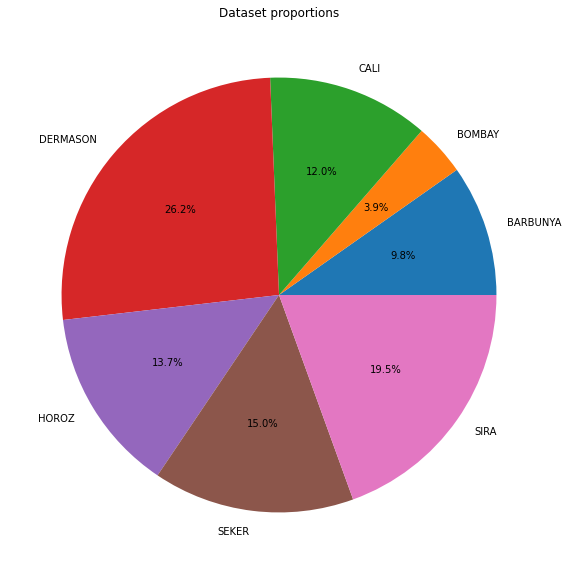

In [9]:
#balancing the dataset with SMOTE
labels, counts = np.unique(df.Class, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [10]:
sm = SMOTE(random_state=42)
     

In [11]:
X = df.drop('Class', axis=1)
y = df.Class
     

In [12]:
X_sm, y_sm = sm.fit_resample(X, y)

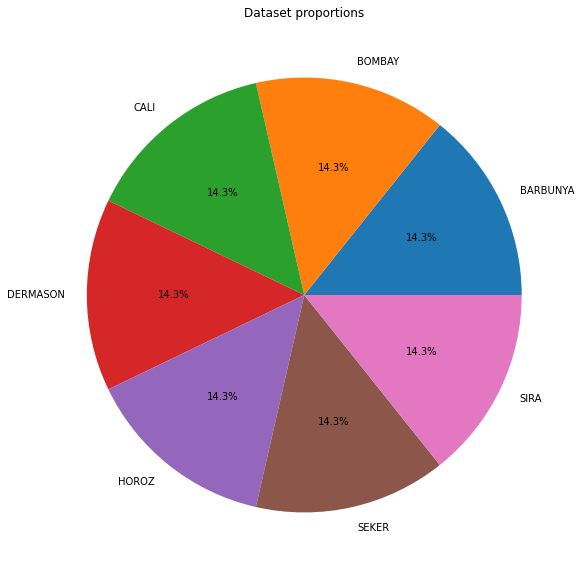

In [13]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

In [14]:
#one hot encoding 
list(np.unique(y_sm))
     

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [15]:
y_sm.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [i for i in range(len(np.unique(y_sm)))])

0        5
1        5
2        5
3        5
4        5
        ..
24817    6
24818    6
24819    6
24820    6
24821    6
Name: Class, Length: 24822, dtype: int64

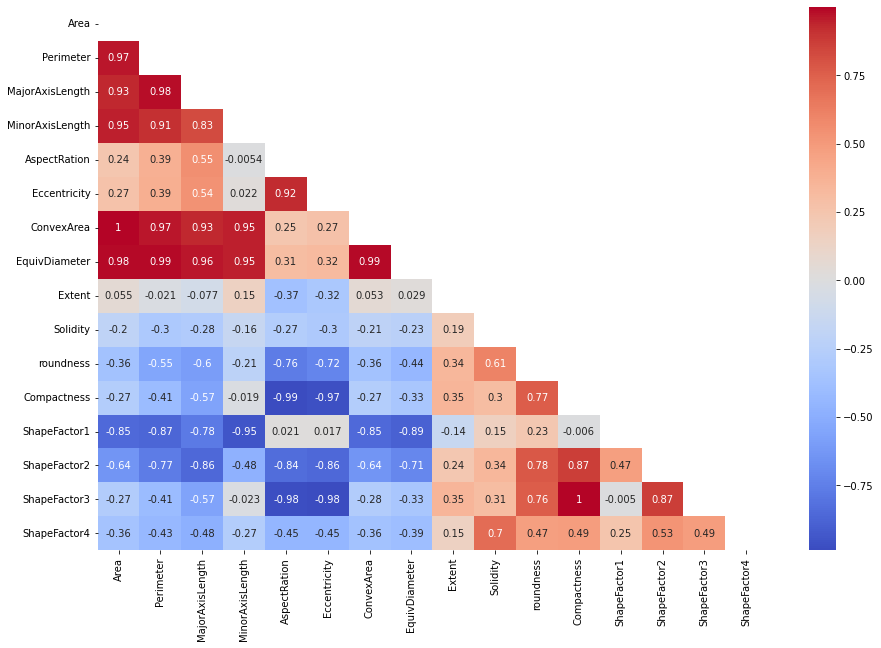

In [16]:
#drop over-correlated features
plt.figure(figsize=(15, 10))
sns.heatmap(data=df.corr(), cmap='coolwarm', mask=np.triu(df.corr()), annot=True)
plt.show()

In [17]:

X_sm.drop(['ConvexArea', 'EquivDiameter'], axis=1, inplace=True)

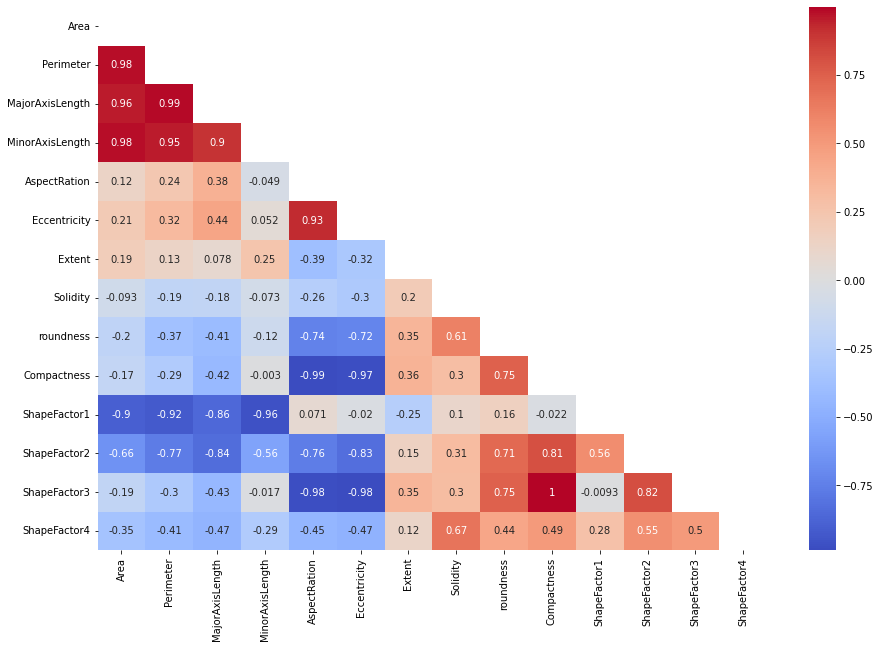

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(data=X_sm.corr(), cmap='coolwarm', mask=np.triu(X_sm.corr()), annot=True)
plt.show()
     

In [19]:
#data split and normalization 
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, random_state=42, shuffle=True, test_size=0.2)

In [20]:
sc = StandardScaler()
sc.fit_transform(X_train)
sc.transform(X_test)

array([[-0.54390397, -0.42150986, -0.07523552, ..., -0.86584636,
        -1.86808848,  0.508622  ],
       [-0.8230652 , -0.99970786, -1.07668346, ...,  1.26560579,
         0.73586588,  0.43100747],
       [-0.56911811, -0.64111116, -0.62289708, ...,  0.35389758,
         0.16934322,  0.60929323],
       ...,
       [ 2.58162709,  2.29821874,  2.26247548, ..., -1.22843021,
        -0.16803988, -0.62652672],
       [ 3.10886153,  2.67532434,  2.53756055, ..., -1.2583676 ,
        -0.01440704, -0.75700431],
       [ 0.12978569,  0.35239066,  0.60647889, ..., -0.97925807,
        -1.23753452, -1.39027146]])

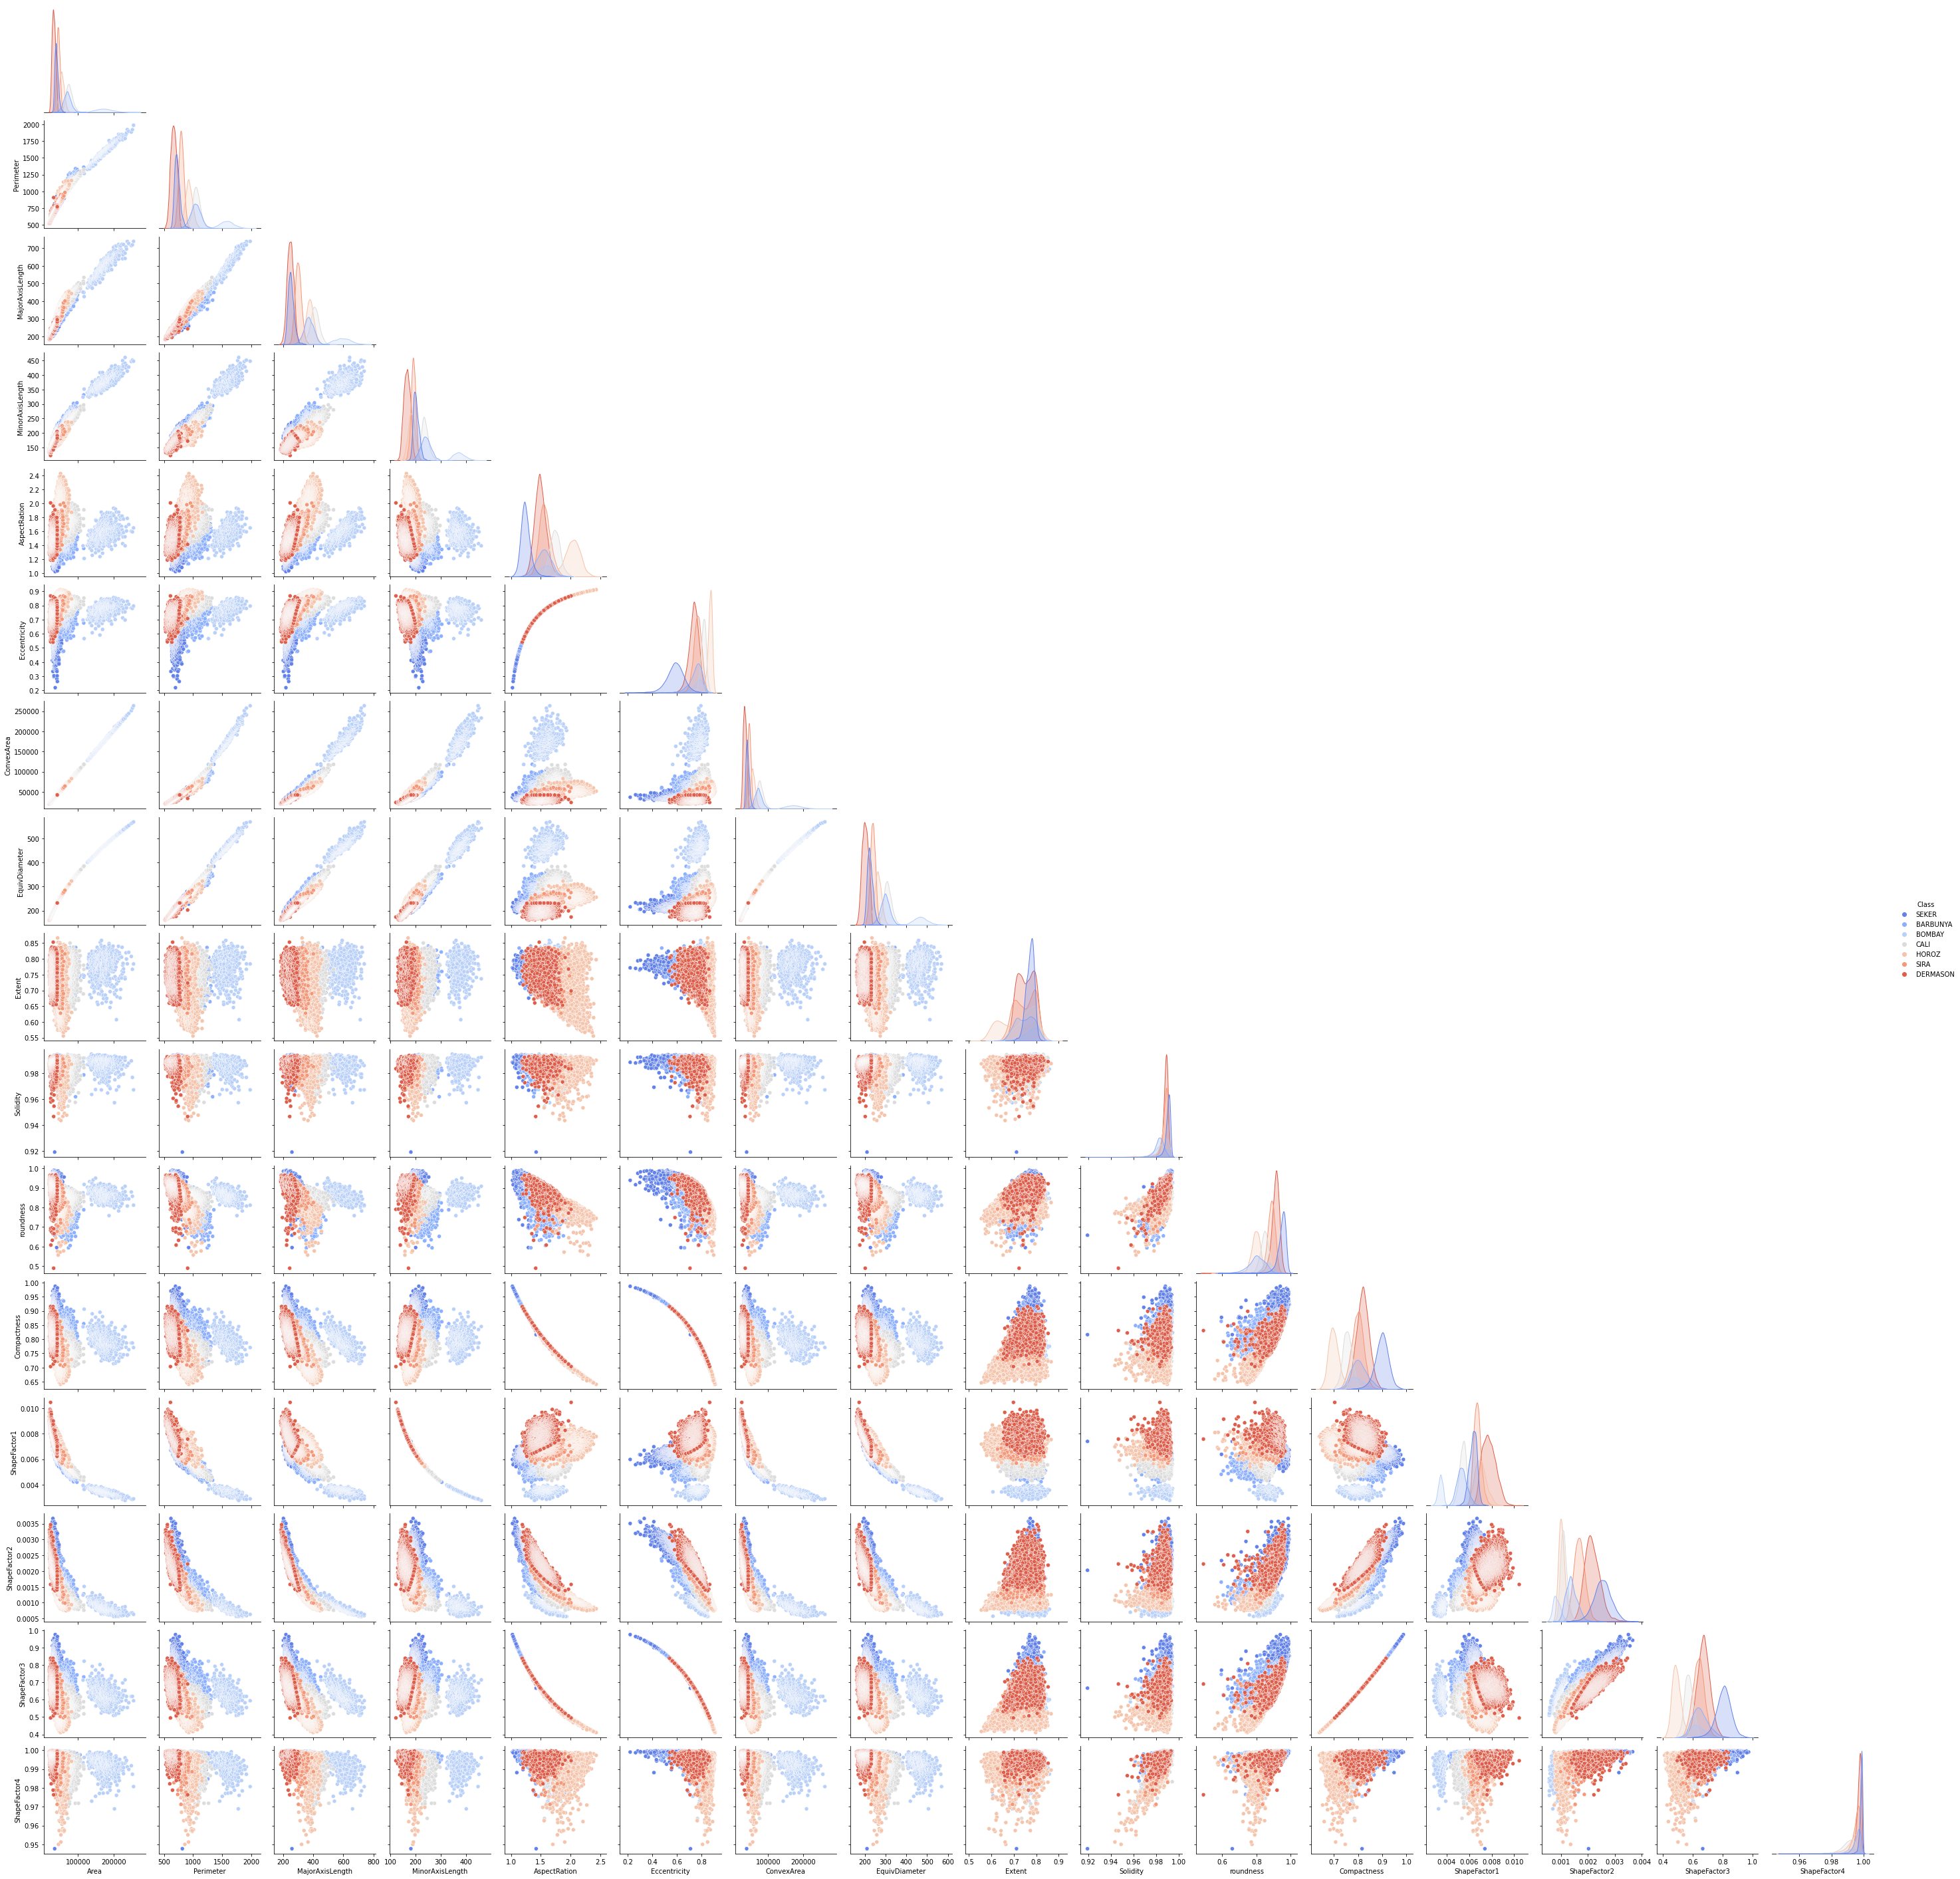

In [21]:
#visualization
sns.pairplot(df, hue='Class', corner=True, palette='coolwarm')
plt.show()

In [22]:
#model training 
model = LogisticRegression(penalty='l2', verbose=1, n_jobs=-1)

In [23]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [24]:
LogisticRegression().solver

'lbfgs'

In [25]:
params = {
    'solver':['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'multi_class':['ovr', 'multinomial']
}
    

In [26]:
clf = GridSearchCV(
    model,
    param_grid=params,
    scoring=f1_score,
    cv=5
)
    

In [27]:
clf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  1.62268D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  4.63955D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  3.84099D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  4.82127D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  F =   710.66597137379597     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate   50    f=  5.72649D+03    |proj g|=  2.00655D+03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     63     77      1     0     0   4.989D+02   5.726D+03
  F =   5726.4606964609966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  3.83979D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  4.32803D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  4.82250D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10106D+04    |proj g|=  4.63799D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of functi

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  3.84367D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  1.61274D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  4.82683D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  4.32984D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.2s finished


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  3.83864D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  1.62349D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  4.32244D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  3.97003D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =     

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  3.97015D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  4.81989D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  4.63779D+08
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  1.61732D+08
 N =     

/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10113D+04    |proj g|=  3.84201D+08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     39     50      1     0     0   5.391D+03   6.160D+03
  F =   6160.3878325370897     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The

[LibLinear]iter  1 act 3.218e+03 pre 2.839e+03 delta 1.650e-05 f 1.101e+04 |g| 3.972e+08 CG   1
iter  2 act 3.618e+02 pre 3.176e+02 delta 1.650e-05 f 7.793e+03 |g| 9.171e+07 CG   1
iter  3 act 2.050e+01 pre 1.970e+01 delta 1.650e-05 f 7.431e+03 |g| 1.825e+07 CG   1
cg reaches trust region boundary
iter  4 act 5.897e+00 pre 5.897e+00 delta 6.599e-05 f 7.411e+03 |g| 1.148e+06 CG   2
cg reaches trust region boundary
iter  5 act 2.293e+01 pre 2.294e+01 delta 2.640e-04 f 7.405e+03 |g| 3.688e+05 CG   2
cg reaches trust region boundary
iter  6 act 8.774e+01 pre 8.786e+01 delta 1.056e-03 f 7.382e+03 |g| 1.192e+06 CG   2
cg reaches trust region boundary
iter  7 act 2.589e+02 pre 2.735e+02 delta 2.305e-03 f 7.294e+03 |g| 3.776e+05 CG   2
iter  8 act 3.131e+00 pre 3.065e+00 delta 2.305e-03 f 7.035e+03 |g| 8.049e+06 CG   1
cg reaches trust region boundary
iter  9 act 1.544e+02 pre 1.645e+02 delta 2.994e-03 f 7.032e+03 |g| 3.055e+05 CG   3
iter 10 act 3.256e+00 pre 3.186e+00 delta 2.994e-03 f 6.878

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The 

Epoch 1, change: 1.00000000
Epoch 2, change: 0.32012992
Epoch 3, change: 0.30723721
Epoch 4, change: 0.24703092
Epoch 5, change: 0.19715668
Epoch 6, change: 0.16444440
Epoch 7, change: 0.14108885
Epoch 8, change: 0.12356266
Epoch 9, change: 0.10980186
Epoch 10, change: 0.09879686
Epoch 11, change: 0.08980390
Epoch 12, change: 0.08229233
Epoch 13, change: 0.07592947
Epoch 14, change: 0.07047641
Epoch 15, change: 0.06575030
Epoch 16, change: 0.06161165
Epoch 17, change: 0.05795760
Epoch 18, change: 0.05470874
Epoch 19, change: 0.05180124
Epoch 20, change: 0.04918349
Epoch 21, change: 0.04681576
Epoch 22, change: 0.04466232
Epoch 23, change: 0.04269419
Epoch 24, change: 0.04089209
Epoch 25, change: 0.03923361
Epoch 26, change: 0.03770167
Epoch 27, change: 0.03628361
Epoch 28, change: 0.03496629
Epoch 29, change: 0.03374111
Epoch 30, change: 0.03259720
Epoch 31, change: 0.03152593
Epoch 32, change: 0.03052181
Epoch 33, change: 0.02957923
Epoch 34, change: 0.02869258
Epoch 35, change: 0.027

/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.


15857
Epoch 36, change: 0.02737427
Epoch 37, change: 0.02663257
Epoch 38, change: 0.02592940
Epoch 39, change: 0.02526244
Epoch 40, change: 0.02462821
Epoch 41, change: 0.02402508
Epoch 42, change: 0.02345016
Epoch 43, change: 0.02290236
Epoch 44, change: 0.02237910
Epoch 45, change: 0.02187906
Epoch 46, change: 0.02140078
Epoch 47, change: 0.02094259
Epoch 48, change: 0.02050360
Epoch 49, change: 0.02008226
Epoch 50, change: 0.01967802
Epoch 51, change: 0.01928928
Epoch 52, change: 0.01891556
Epoch 53, change: 0.01855582
Epoch 54, change: 0.01820949
Epoch 55, change: 0.01787574
Epoch 56, change: 0.01755373
Epoch 57, change: 0.01724321
Epoch 58, change: 0.01694319
Epoch 59, change: 0.01665332
Epoch 60, change: 0.01637324
Epoch 61, change: 0.01610207
Epoch 62, change: 0.01583978
Epoch 63, change: 0.01558566
Epoch 64, change: 0.01533969
Epoch 65, change: 0.01510116
Epoch 66, change: 0.01486981
Epoch 67, change: 0.01464533
Epoch 68, change: 0.01442742
Epoch 69, change: 0.01421603
Epoch 70

/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.50527742
Epoch 3, change: 0.33931807
Epoch 4, change: 0.25000709
Epoch 5, change: 0.20054387
Epoch 6, change: 0.16619518
Epoch 7, change: 0.14215556
Epoch 8, change: 0.12356275
Epoch 9, change: 0.10962987
Epoch 10, change: 0.09808354
Epoch 11, change: 0.08880493
Epoch 12, change: 0.08105382
Epoch 13, change: 0.07446997
Epoch 14, change: 0.06885595
Epoch 15, change: 0.06398300
Epoch 16, change: 0.05973399
Epoch 17, change: 0.05597324
Epoch 18, change: 0.05263891
Epoch 19, change: 0.04965133
Epoch 20, change: 0.04696116
Epoch 21, change: 0.04452923
Epoch 22, change: 0.04231590
Epoch 23, change: 0.04030091
Epoch 24, change: 0.03844690
Epoch 25, change: 0.03674160
Epoch 26, change: 0.03516084
Epoch 27, change: 0.03370283
Epoch 28, change: 0.03234600
Epoch 29, change: 0.03108332
Epoch 30, change: 0.02990686
Epoch 31, change: 0.02880025
Epoch 32, change: 0.02776327
Epoch 33, change: 0.02679023
Epoch 34, change: 0.02587276
Epoch 35, change: 0.025

 This problem is unconstrained.



At iterate   50    f=  1.17163D+04    |proj g|=  1.17572D+05

At iterate  100    f=  8.51961D+03    |proj g|=  2.61171D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  105    100    114      1     0     0   2.612D+05   8.520D+03
  F =   8519.6087652834340     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          105     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09127D+04    |proj g|=  2.33885D+08


 This problem is unconstrained.



At iterate   50    f=  1.17657D+04    |proj g|=  7.77801D+05

At iterate  100    f=  8.55095D+03    |proj g|=  1.81012D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  105    100    110      1     0     0   1.810D+05   8.551D+03
  F =   8550.9465913497788     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
 This problem is unconstrained.


Epoch 1, change: 1.00000000
Epoch 2, change: 0.50161136
Epoch 3, change: 0.34343417
Epoch 4, change: 0.26225845
Epoch 5, change: 0.20863288
Epoch 6, change: 0.17223777
Epoch 7, change: 0.14618556
Epoch 8, change: 0.12668780
Epoch 9, change: 0.11174868
Epoch 10, change: 0.09984064
Epoch 11, change: 0.09012431
Epoch 12, change: 0.08207292
Epoch 13, change: 0.07529276
Epoch 14, change: 0.06949192
Epoch 15, change: 0.06447163
Epoch 16, change: 0.06009395
Epoch 17, change: 0.05624322
Epoch 18, change: 0.05280285
Epoch 19, change: 0.04973405
Epoch 20, change: 0.04697930
Epoch 21, change: 0.04449532
Epoch 22, change: 0.04222962
Epoch 23, change: 0.04015994
Epoch 24, change: 0.03826583
Epoch 25, change: 0.03652281
Epoch 26, change: 0.03491606
Epoch 27, change: 0.03342724
Epoch 28, change: 0.03204795
Epoch 29, change: 0.03075726
Epoch 30, change: 0.02955095
Epoch 31, change: 0.02841866
Epoch 32, change: 0.02736439
Epoch 33, change: 0.02637325
Epoch 34, change: 0.02543954
Epoch 35, change: 0.024

/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBacken

Epoch 1, change: 1.00000000
Epoch 2, change: 0.49547148
Epoch 3, change: 0.32480309
Epoch 4, change: 0.23871820
Epoch 5, change: 0.18707264
Epoch 6, change: 0.15341407
Epoch 7, change: 0.12955846
Epoch 8, change: 0.11232765
Epoch 9, change: 0.09885740
Epoch 10, change: 0.08826201
Epoch 11, change: 0.07963158
Epoch 12, change: 0.07242095
Epoch 13, change: 0.06635292
Epoch 14, change: 0.06114208
Epoch 15, change: 0.05662779
Epoch 16, change: 0.05268501
Epoch 17, change: 0.04921557
Epoch 18, change: 0.04612576
Epoch 19, change: 0.04338666
Epoch 20, change: 0.04090612
Epoch 21, change: 0.03868447
Epoch 22, change: 0.03665653
Epoch 23, change: 0.03481713
Epoch 24, change: 0.03314264
Epoch 25, change: 0.03160210
Epoch 26, change: 0.03018635
Epoch 27, change: 0.02887690
Epoch 28, change: 0.02766502
Epoch 29, change: 0.02654107
Epoch 30, change: 0.02550358
Epoch 31, change: 0.02452742
Epoch 32, change: 0.02361990
Epoch 33, change: 0.02276736
Epoch 34, change: 0.02197175
Epoch 35, change: 0.021

 This problem is unconstrained.
 This problem is unconstrained.
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ishaani/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1, verbose=1),
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']},
             scoring=<function f1_score at 0x136a0adc0>)

In [28]:
model = clf.best_estimator_

In [29]:
y_pred = model.predict(X_test)

In [30]:

print(f'The model accuracy is: {np.round(accuracy_score(y_test, y_pred), decimals=3)*100}%')

The model accuracy is: 91.2%


In [31]:
print(f'The model f1 score is: {np.round(f1_score(y_test, y_pred, average="""weighted"""), decimals=3)*100}%')

The model f1 score is: 91.3%


<Figure size 864x864 with 0 Axes>

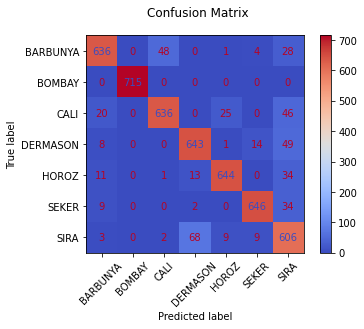

max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 0 seconds
max_iter reached after 1 seconds
max_iter reached after 1 seconds
Epoch 1, change: 1.00000000
Epoch 2, change: 0.06495135
Epoch 3, change: 0.10962832
Epoch 4, change: 0.13099857
Epoch 5, change: 0.06259941
Epoch 6, change: 0.06142867
Epoch 7, change: 0.06177592
Epoch 8, change: 0.06010384
Epoch 9, change: 0.06048066
Epoch 10, change: 0.05960367
Epoch 11, change: 0.05962118
Epoch 12, change: 0.05944223
Epoch 13, change: 0.05906466
Epoch 14, change: 0.05891037
Epoch 15, change: 0.05869214
Epoch 16, change: 0.05843827
Epoch 17, change: 0.05699594
Epoch 18, change: 0.05378503
Epoch 19, change: 0.05091549
Epoch 20, change: 0.04832689
Epoch 21, change: 0.04598519
Epoch 22, change: 0.04385191
Epoch 23, change: 0.04190605
Epoch 24, ch

In [32]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='coolwarm')
plt.xticks(rotation=45)
plt.suptitle('Confusion Matrix')
plt.show()